What is Asrtropy?
It is the library for Astronomyer made by Astronomers. It has all functionalities Astronomers may need.

1. open fits files and dealing with Tabular Data as "TOPCAT"
2. Has a queriy and VO package
3. has photometric and spectroscopic packages 
4. fitting and statistical packages 
5. Cosmology, GR, Magnetohydeodynamics..........etc functions are there ready for use  

In [79]:
pip install Astropy 

In [80]:
import numpy as np 
import matplotlib.pyplot as plt

In [20]:
from astropy.io import fits
from astropy.table import Table
from astropy.units import cds                   # adding the units to the values           
cds.enable()
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo  

In [82]:
Chandra=fits.open("dr7 vs Chandra.fits")         #open function reads the file 

Each table consists of HDU: Header Data Units lists. 
HDU[0]: For the coloumn names 
HDU[1]: For the first row data 

In [1]:
Chan= Table(Chandra[1].data)  
Chan.show()                      #to open the table 
#Chan.info()

NameError: name 'Table' is not defined

In [138]:
Z=Chan['REDSHIFT']                               #calling column parameters 
X=Chan['flux_aper_b']
name=Chan['SDSS_NAME']
RA=Chan['RA']
DEC=Chan['DEC']
#print(Z)

<ipython-input-93-16305ef174a6>:1: RuntimeWarning: divide by zero encountered in log
  plt.scatter(Z,np.log(X))


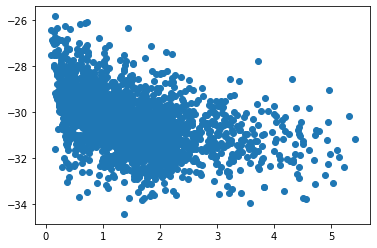

In [93]:
plt.scatter(Z,np.log(X))

2.Constants

In [94]:
from astropy import constants as const

In [95]:
const.G

<<class 'astropy.constants.codata2018.CODATA2018'> name='Gravitational constant' value=6.6743e-11 uncertainty=1.5e-15 unit='m3 / (kg s2)' reference='CODATA 2018'>

In [96]:
const.c

<<class 'astropy.constants.codata2018.CODATA2018'> name='Speed of light in vacuum' value=299792458.0 uncertainty=0.0 unit='m / s' reference='CODATA 2018'>

In [98]:
np.pi

3.141592653589793

3. Units Conversion

In [99]:
from astropy import units as u
cms= u.cm/u.s                                     #velosity

In [100]:
from astropy.units import imperial
mph= u.imperial.mile/u.hour 

In [102]:
q=24*cms
print(q)

24.0 cm / s


In [103]:
q.to(mph)

<Quantity 0.53686471 mi / h>

In [104]:
const.c.to("pc/yr")

<Quantity 0.30660139 pc / yr>

In [105]:
(15* u.m)/(32 *u.s)


<Quantity 0.46875 m / s>

In [106]:
(3* u.km)/(130* u.m/u.s)

<Quantity 0.02307692 km s / m>

In [107]:
((3* u.km)/(130* u.m/u.s)).decompose()

<Quantity 23.07692308 s>

4. Dealing with cosmological models

Distance luminosity: 
The relationship between the absolute magnitude M and apparent magnitude m of an astronomical object.
Or the relationship between the Luminosity and flux.

calcualte the luminousity using the flux(F) and the redshift(Z)

In [112]:
from astropy.cosmology import WMAP9 as cosmo
cosmo.age(3)            # Input (redshift)

<Quantity 2.17828085 Gyr>

In [113]:
DL= cosmo.luminosity_distance(Z)
print(DL)

[18183.78176992 14438.37406244  4848.06686757 ...  5648.90894781
  1935.19078326 16253.34218656] Mpc


In [114]:
from astropy import units as u                   #unit conversion from Megaparsec to cm 
DLL = (DL).to(u.cm)

In [130]:
L= 4 *np.pi * np.power(DLL,2) *X * u.erg / u.s / u.cm**2   #xrays luminosity calculations 
print(L)
LL=np.log10(L.value)
len(LL)

[1.16824199e+44 1.16214821e+45 3.88577252e+44 ... 4.03878027e+44
 3.40313218e+43 1.00153617e+45] erg / s


<ipython-input-130-1bff5c095e82>:3: RuntimeWarning: divide by zero encountered in log10
  LL=np.log10(L.value)


2561

5. Save fits table 

In [140]:
c1 = fits.Column(name='Name', array=name, format='20A')
c2 = fits.Column(name='New_Z', array=Z, format='F')
c3 = fits.Column(name='ra', array=RA , format='F')
c4 = fits.Column(name='dec', array=DEC, format='F')
c5 = fits.Column(name='Luminosity', array=LL, format='F')

Fatma = fits.BinTableHDU.from_columns([c1, c2, c3, c4,c5])
Fatma.writeto('python.fits')


In [143]:
F=fits.open("python.fits")
FFF= Table(F[1].data)                     
FFF.info()

<Table length=2561>
   name     dtype  n_bad
---------- ------- -----
      Name   str20     0
     New_Z float64     0
        ra float64     0
       dec float64     0
Luminosity float64   126


6. Fitting and Modelling

In [68]:
from astropy.modeling import models, fitting

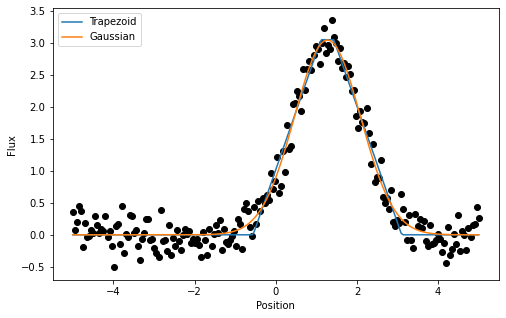

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting

# Generate fake data
np.random.seed(0)
x = np.linspace(-5., 5., 200)
y = 3 * np.exp(-0.5 * (x - 1.3)**2 / 0.8**2)
y += np.random.normal(0., 0.2, x.shape)

# Fit the data using a box model.
# Bounds are not really needed but included here to demonstrate usage.
t_init = models.Trapezoid1D(amplitude=1., x_0=0., width=1., slope=0.5,
                            bounds={"x_0": (-5., 5.)})
fit_t = fitting.LevMarLSQFitter()
t = fit_t(t_init, x, y)

# Fit the data using a Gaussian
g_init = models.Gaussian1D(amplitude=1., mean=0, stddev=1.)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, x, y)

# Plot the data with the best-fit model
plt.figure(figsize=(8,5))
plt.plot(x, y, 'ko')
plt.plot(x, t(x), label='Trapezoid')
plt.plot(x, g(x), label='Gaussian')
plt.xlabel('Position')
plt.ylabel('Flux')
plt.legend(loc=2)